## Data importation

In [1]:
import pandas as pd
import numpy as np

data_raw = pd.read_csv("data.csv", delimiter=";")
data = np.array(data_raw)

weights = [4, 3, 5, 3, 5, 1, 12, 9]

C:\Users\Travail\AppData\Local\Temp\ipykernel_12688\3537920797.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## First application of ELECTRE II

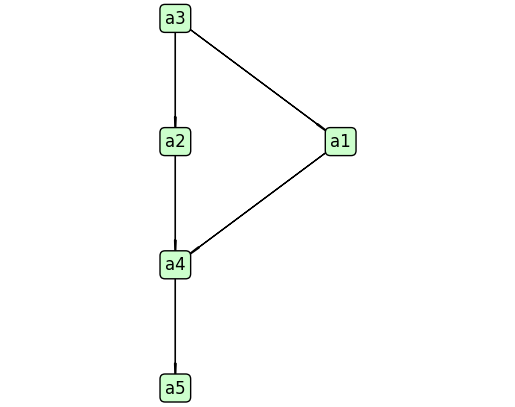

In [10]:
from pyDecision.algorithm import electre_ii


c_minus = 0.65
c_zero  = 0.75
c_plus  = 0.85

d_minus = 0.25
d_plus  = 0.50

concordance, discordance, dominance_s, dominance_w, rank_D, rank_A, rank_N, rank_P = electre_ii(data, W = weights, c_minus = c_minus, c_zero = c_zero, c_plus = c_plus, d_minus = d_minus, d_plus = d_plus, graph = True)

## Robustness study

In [17]:

values = {
	"a1": [0, 0, 0, 0, 0],
	"a2": [0, 0, 0, 0, 0],
	"a3": [0, 0, 0, 0, 0],
	"a4": [0, 0, 0, 0, 0],
	"a5": [0, 0, 0, 0, 0]
}

ranks = []
for c_minus in np.arange(0, 1.1, 0.1):

	for c_zero in np.arange(0, 1.1, 0.1):

		for c_plus in np.arange(0, 1.1, 0.1):

			for d_minus in np.arange(0, 1.1, 0.1):

				for d_plus in np.arange(0, 1.1, 0.1):
					
					try:
						concordance, discordance, dominance_s, dominance_w, rank_D, rank_A, rank_N, rank_P = electre_ii(data, W = weights, c_minus = c_minus, c_zero = c_zero, c_plus = c_plus, d_minus = d_minus, d_plus = d_plus, graph = False)
						ranks.extend(rank_D)
						
						for position in range(len(rank_D)):
							for action in rank_D[position]:
								values[action][position] +=1

					except IndexError:
						pass

In [18]:


values


{'a1': [26915, 82768, 51368, 0, 0],
 'a2': [2075, 66856, 92120, 0, 0],
 'a3': [147691, 12880, 480, 0, 0],
 'a4': [14019, 22184, 53976, 70872, 0],
 'a5': [2075, 12880, 21248, 53976, 70872]}

In [22]:
import copy
general_ranks = copy.copy(values)

for key, value in general_ranks.items():
	general_ranks[key] = np.dot(general_ranks[key], [1, 2, 3, 4, 5])/np.sum(general_ranks[key])

general_ranks

{'a1': 2.151833891127655,
 'a2': 2.5591086053486163,
 'a3': 1.085935511111387,
 'a4': 3.1282202532117154,
 'a5': 4.109524312174404}